# 5. Probabilistic Roadmap and RRT
Basic implementation of Rapidly-exploring Random Tree (RRT) for path planning.

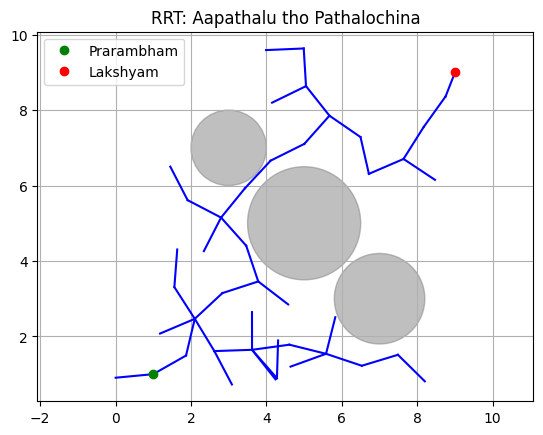

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def dhooram(bindu1, bindu2):
    return np.linalg.norm(np.array(bindu1) - np.array(bindu2))

def sanchalana_bindu():
    return np.random.uniform(0, 10), np.random.uniform(0, 10)

def lo_unda(bindu, aapathalu):
    for (madhya, paridhi) in aapathalu:
        if dhooram(bindu, madhya) < paridhi:
            return True
    return False

# Aapathalu = Obstacles (list of (center, radius))
aapathalu = [
    ((5, 5), 1.5),
    ((3, 7), 1),
    ((7, 3), 1.2)
]

prarambham = (1, 1)
lakshyam = (9, 9)
gundrulu = [prarambham]
rekhalu = []

for _ in range(500):
    chanchala = sanchalana_bindu()
    daggara = min(gundrulu, key=lambda b: dhooram(b, chanchala))
    disha = np.array(chanchala) - np.array(daggara)
    theda = np.array(daggara) + disha / np.linalg.norm(disha)
    kotta_bindu = tuple(theda)

    if lo_unda(kotta_bindu, aapathalu):
        continue

    gundrulu.append(kotta_bindu)
    rekhalu.append((daggara, kotta_bindu))

    if dhooram(kotta_bindu, lakshyam) < 1.0 and not lo_unda(lakshyam, aapathalu):
        rekhalu.append((kotta_bindu, lakshyam))
        break

# Chitra
chitra, dhruvam = plt.subplots()
for (a, b) in rekhalu:
    dhruvam.plot([a[0], b[0]], [a[1], b[1]], 'b-')

for (madhya, paridhi) in aapathalu:
    gola = plt.Circle(madhya, paridhi, color='gray', alpha=0.5)
    dhruvam.add_patch(gola)

dhruvam.plot(prarambham[0], prarambham[1], 'go', label='Prarambham')
dhruvam.plot(lakshyam[0], lakshyam[1], 'ro', label='Lakshyam')
dhruvam.set_title("RRT: Aapathalu tho Pathalochina")
dhruvam.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
